
# Métodos de integración

 Das notas da prof. Pilar Hernández Gamazo (U. de València)


In [1]:
import time
print(' Última execución  ', time.asctime() )

 Última execución   Mon Mar  4 23:22:06 2024



## Obxectivos

 Presentar e mostrar con exemplos sinxelos os distintos métodos de integración
-  Integrais inmediatas,
-  Integración por partes,
-  Integración por substitución,
-  Integración de fraccións de polinomios,
-  Integración de funcións trigonométicas.
- Presentar integrais impropias e mostrar algúns exemplos.


In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import sympy as sp
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')

figsize = 6, 3.8
cmap    = 'hot'


## Integrais inmediatas

 Algunhas integrais son inmediatas grazas ao 1o teorema do cálculo integral que nos di que se $f(x)$ é unha función continua.

$$
F(x) = \int_a^x f(x) \, \mathrm{d}x \;\; \Rightarrow \;\; F'(x) = f(x)
$$


Integrais inmediatas triviais

$$
\int x^n \, \mathrm{d}x = \frac{1}{n+1} x^{n+1}, \, \mathrm{si} \, n \ne -1,\\
$$
$$
\int e^x \, \mathrm{d}x = e^x , \; \int \frac{1}{x} \, \mathrm{d}x = \log x, \, \mathrm{si} \, x \gt 0 \\
$$
$$
\int \cos x \, \mathrm{d}x = \sin x, \; \int \sin x \, \mathrm{d}x = - \cos x, \;
\int \frac{1}{\cos^2 x} \, \mathrm{d}x = \tan x
$$ 

Nestas notas $\log$ é sempre Neperiano!

Outras integrais inmediatas non tan triviais:

$$
\int \frac{1}{1+x^2} \, \mathrm{d}x = \arctan x, \; \int \frac{1}{\sqrt{1-x^2}} \, \mathrm{d}x = \arcsin x, \, \mathrm{si} \, -1 \lt x \lt 1,
$$
$$
\int \frac{1}{\sqrt{1+x^2}} \, \mathrm{d}x = \mathrm{arcsinh} \, x, \,
\int \frac{1}{\sqrt{x^2-1}} \, \mathrm{d}x = \mathrm{arccosh} \, x, \, \mathrm{si} \, |x| \gt 1, \\
\int \frac{1}{1-x^2} \, \mathrm{d}x = \mathrm{arctanh} \,  x, \, \mathrm{si} -1 \lt x \lt 1.
$$

Lembremos:
    
$$
\sinh = \frac{e^x-e^{-x}}{2}, \; \cosh = \frac{e^x + e^{-x}}{2}, \; \tanh = \frac{e^{2x}-1}{e^{2x}+1}
$$

e

$$
\mathrm{arcsinh} \, x = \log \left(x + \sqrt{x^2+1} \right), \; 
\mathrm{arccosh} \, x = \log \left(x + \sqrt{x^2-1} \right), \; \mathrm{si} \; x \gt 1, \\
\mathrm{arctanh} \, x = \frac{1}{2}\log \frac{1+x}{1-x}, \, \mathrm{si} \; 0 \le x \lt 1\;.
$$


## Integración por partes

 Sexan $f(x), \, g(x)$ funcións continuas, entón temos:

$$
\int f(x) \, g'(x) \, \mathrm{d}x = f(x) \, g(x) - \int f'(x) \, g(x) \, \mathrm{d}x
$$

De:

$$
f(x) \, g(x) = \int \left[f(x) \, g(x)\right]' \, \mathrm{d}x = \int f'(x) \, g(x) \, \mathrm{d}x + \int f(x) \, g'(x) \, \mathrm{d}x
$$

*Exercicio:* Calcula
    
$$
\int x \, e^x \, \mathrm{d}x
$$

*Solución:*

tomamos: $f(x) = x, \; g'(x) = e^x$, así $f'(x) = 1, \; g(x) = e^x$, entón:

$$
\int x \, e^x \, \mathrm{d}x = x \, e^x - \int e^x \mathrm{dx} = x \, e^x - e^x  = e^x \, (x - 1).
$$


## Integrais por substitución

Sexan $f(x), g'(x)$ continuas e $F(x)$ primitiva de $f(x)$, $F'(x) = f(x)$, temos:

$$
\int f(g(x)) \, g'(x) \, \mathrm{d}x = F(g(x))
$$

 tendo en conta que pola regra da cadea:

$$
F(g(x))' = F'(g(x)) \, f'(x) = f(g(x)) \, g'(x)
$$

*Exercicio*: Calcula
    
$$
\int \frac{1}{x \log x} \mathrm{d}x 
$$
    
*Solución*:

Se tomamos:

$$
f(x) = \frac{1}{x}, \; g'(x) = \frac{1}{x} \Rightarrow F(x) = \log(x), \, g(x) = \log(x)
$$

Polo tanto:

$$
f(g(x)) \, g'(x) = \frac{1}{x\log x}
$$
$$
\int \frac{1}{x \log x} \mathrm{d}x = \log (\log x)
$$



De forma equivalente podemos facer o seguinte cambio de variable:

 $$
 u = \log x \Rightarrow \mathrm{d}u = \frac{1}{x} \, \mathrm{d}x
 $$

 Polo tanto

 $$
 \int \frac{1}{x \log x} \, \mathrm{d}x = \int \frac{1}{u} \, \mathrm{d}u = \log u = \log(\log x)
 $$



Na seguinte cela verificaremos a integral con *SymPy* .

 *SymPy* é un módulo *de Python* que nos permite calcular derivadas, integrais, etc con cálculo simbólico.


In [3]:
x = sp.symbols("x")
sp.integrate("1/(x*log(x))", x)

log(log(x))


## Integración de funcións racionais

 Estas integrais son:

 $$
 \int \frac{P_n(x)}{Q_m(x)} \, \mathrm{d}x
 $$

 onde o grao dos polinomios é completo, $n<m$:

$$
P_n(x) = x^n + a_{n-1} x^{n-1} + \dots + a_{0} \\
Q_m(x) = x^m + b_{m-1} x^{m-1} + \dots + b_{0}
$$

 O método de integración pode ser longo pero está ben definido.

 Está formado polos seguintes pasos:
1.  calcular as raíces do polinomio denominador,
1.  descompoñer a razón nunha suma de razóns máis sinxelas,
1.  integrar cada razón simple en integrais que estean tabuladas.

 *Pregunta:* no caso de que a razón entre os polinomios sexa $n \ge m$, como farías a integral?



### Descomposición polinómica

 O polinomio denominador pódese descompoñer no produto de polinomios:

 $$
 Q_m(x) = (x-\alpha_1)^{n_1} \dots (x-\alpha_p)^{n_p} \; (x^2+\beta_1x+\gamma_1)^{m_1} \dots (x^2+\beta_q+\gamma_q)^{m_q}
 $$

 onde $\alpha_i$ son as $p$ raíces reais, $i=1, \dots, p$, cada unha delas con multiplicidade $n_i$.

 e os $\beta_i, \gamma_i$ son os valores reais que corresponden ás $q$ raíces imaxinarias, $i=1, \dots, q$, que satisfacen, $\beta^2_i - 4 \gamma_i \lt 0$ , e que cada unha aparece con multiplicidade $m_i$.



*Exemplo:* Descompoñer o polinomio: $Q_3(x) = x^3 + 2x^2 +2x +1$

 Podemos comprobar que unha raíz é $\alpha = -1, \; Q(-1) = -1 + 2 -2 + 1 = 0.$

 Entón o polinomio é:

 $$
 Q_3(x) = (x +1) \, (A x^2 + B x + C) = A x^3 + (A+B) x^2 + (B+C) x + C
 $$

 Polo tanto:

 $$
 A = 1, \; A+B = 2, \; B+C = 2, \; C = 1
 $$

 que ten a solución: $A=B=C=1$.

 O polinomio $x^2 + x + 1$ non ten unha raíz real, só imaxinaria, con $\beta = 1, \gamma = 1$, que satisfacen $\beta^2 - 4 \gamma = -3 < 0 $.

 A descomposición do polinomio é:

 $$
 Q_3(x) = (x+1) \, (x^2+x+1)
 $$


### Suma de razóns máis sinxelas

 Dada a descomposición de $Q_m(x)$, a razón de polinomios pódese expresar como a suma de fraccións máis sinxelas de polinomios::

$$
\frac{P_n(x)}{Q_m(x)} = \sum_{i=1}^p \frac{A^i_1}{(x-\alpha_i)} + \frac{A^i_2}{(x-\alpha_i)^2} + \dots + \frac{A^i_{n_i}}{(x-\alpha_i)^{n_i}}  \\
+ \sum_{j = 1}^{q} \frac{B^j_1 x + C^j_1}{(x^2 + \beta_j x + \gamma_j)} + \frac{B^j_2 x + C^j_2}{(x^2 + \beta_j x + \gamma_j)^2} + \dots + \frac{B^j_{m_j} x + C^j_{m_j}}{(x^2 + \beta_j x + \gamma_j)^{m_j}}
$$


*Exemplo:* Expresa a seguinte razón como a suma de fraccións simples:

 $$
 \frac{P_2(x)}{Q_3(x)} = \frac{3x^2+3x+1}{x^3+2x^2+2x+1}
 $$

 Sabemos que o denominador pode descompoñerse en:

 $$
 Q_3(x) = (x+1) \, (x^2+x+1)
 $$

 onde hai unha raíz real $\alpha_1 = -1$ con multiplicidade $n_1=1$, e unha complexa con $\beta_1 = 1, \gamma = 1$ con multiplicidade $m_1 = 1$

 A razón de polinomios admite a seguinte suma:

 $$
 \frac{3x^2+3x+1}{x^3+2x^2+2x+1} = \frac{A}{x+1} + \frac{Bx + C}{x^2+x+ 1 }
 $$



Para determinar os coeficientes $A, B$ e $C$ igualamos os numeradores:

 $$
 3x^2+3x+1 = A \, (x^2+x+1) + (B x +C) \, (x+1) \ = (A+B) x^2 + (A+B+ C) ) x+ (A+C)
 $$

 O que implica o seguinte conxunto de igualdades:

 $$
 A+B = 3, \, A+B+C = 3, A+C = 1
 $$

 con solución: $A = 1, B= 2, C = 0.$

 Polo tanto:
 
 $$
 \frac{3x^2+3x+1}{x^3+2x^2+2x+1} = \frac{1}{x+1} + \frac{2x}{x^2+x+1}
 $$



### Integrais das razóns máis sinxelas

 A integral dunha razón de polinomios, despois de descompoñela na suma de razóns máis sinxelas, implica as seguintes integrais posibles:

 Para raíces reais con $n=1$

 $$
 \int \frac{A}{(x-\alpha)} \, \mathrm{d}x = A \, \log(x-\alpha)
 $$

 e para $n>1$:

 $$
 \int \frac{A}{(x-\alpha)^n} \, \mathrm{d}x = - \frac{1}{n-1} \frac{A}{(x-\alpha)^ {n-1}}
 $$



Para raíces complexas, para o caso $m = 1$

 $$
 \int \frac{B x + C}{(x^2 + \beta x + \gamma)} \, \mathrm{d} x= \frac{B}{2} \log (x^2+\beta+ \gamma)
-  \frac{C - \beta B /2}{\sqrt{a}} \arctan \frac{x + \beta/2}{\sqrt{a}}
 $$

 onde $a = \gamma - \beta^2/4$

 e para o caso $m >1$:

 $$
 \int \frac{B x + C}{(x^2 + \beta x + \alpha)^m} \, \mathrm{d} x =
-  \frac{B}{2(m - 1)} \frac{1}{(x^2+\beta x+ \alpha)^{m-1}} \
-  \frac{C - \beta B /2}{a^m} \sqrt{a} \int \frac{1}{(u^2+1)^m} \, \mathrm{d}u
 $$

 con $u = \frac{x + \beta/2}{\sqrt{a}}$

 E a última integral obedece a unha regra recorrente:

 $$
 \int \frac{1}{(u^2+1)^m} \, \mathrm{d}x = \frac{2m-3}{2m-2} \int \frac{1}{(u^ 2+1)^{m-1}} \, \mathrm{d}u + \frac{1}{2m-2} \frac{u}{(u^2+1)^{m-1}}
 $$



*Exemplo:* Calcula a integral:

 $$
 \int \frac{3x^2+3x+1}{x^3+2x^2+2x+1} \, \mathrm{d}x
 $$

 *Solución* A integral será a suma das integrais das razóns de polinomios que obtivemos antes.

 $$
 \int \frac{1}{x+1} \, \mathrm{d}x + \int \frac{2x}{x^2+x+1} \, \mathrm{d}x
 $$

 Segundo as regras que vimos anteriormente, estas integrais son válidas:

 $$
 \int \frac{1}{x+1} \, \mathrm{d}x = \log (x+1)
 $$

e

 $$
 \int \frac{2x}{x^2+x+1} \, \mathrm{d}x = \int \frac{2x+1}{x^2+x+1} \mathrm{d} x - \int \frac{1}{x^2+x+1} \, \mathrm{d}x\
 = \log(x^2+2x+1) - \frac{2}{\sqrt{3}} \arctan \frac{2x+1}{\sqrt{3}}
 $$

 Entón:

 $$
 \int \frac{3x^2+3x+1}{x^3+2x^2+2x+1} \, \mathrm{d}x =
 \log (x+1) + \log(x^2+2x+1) - \frac{2}{\sqrt{3}} \arctan \frac{2x+1}{\sqrt{3}}
 $$



Nas seguintes celas verificaremos as integrais con *SymPy*


In [4]:
x       = sp.symbols('x')
sp.integrate("1/(x+1)", x)

log(x + 1)

In [5]:
sp.integrate("2*x/(x**2+x+1)", x)

log(x**2 + x + 1) - 2*sqrt(3)*atan(2*sqrt(3)*x/3 + sqrt(3)/3)/3


## Integrais trigonométricas

###  Integrais con produtos de $\sin x$ e $\cos x$

 Integrais da forma:

 $$
 \int \sin^nx \cos^mx \, \mathrm{d}x
 $$

 Admítense os casos:
-  $n$ e $m$ son pares, $n= 2p, \, m = 2q$. Nese caso usamos recursivamente o cambio:

 $$
 \cos^2 x = \frac{1+\cos 2x}{2}, \; \sin^2 x = \frac{1-\cos 2x}{2}
 $$
 
-  Se $n$ é impar, $n = 2p+1$, facemos o cambio $u = \cos x, \; \mathrm{d}u = - \sin x \, \mathrm{d}x$:

 $$
 \int \sin^nx \cos^mx \, \mathrm{d}x = \int \sin x \sin^{2p}x \cos^mx \, \mathrm{d}x
 = \int - (1-u^2)^pu^m \, \mathrm{d}u
 $$
 
-  Se $m$ é impar, $m = 2q+1$, facemos o cambio $u = \sin x, \, \mathrm{d}u = \cos x \, \mathrm{dx}$:

 $$
 \int \sin^nx \cos^mx \, \mathrm{d}x = \int \cos x \cos^{2q}x \sin^nx \, \mathrm{d}x
 = \int (1-u^2)^qu^n \, \mathrm{d}u
 $$



### Integrais con produtos de $\sin ax$ e $\cos bx$

 Aplicaremos as relacións trigonométricas:

 $$
 \cos ax \, \cos bx = \frac{\cos [(a-b) \, x] + \cos [(a+b) \, x]}{2} \\
 \sin ax \, \sin bx = \frac{\cos [(a-b) \, x] - \cos [(a+b) \, x]}{2} \\
 \sin ax \, \cos bx = \frac{\sin [(a-b) \, x] + \sin [(a+b) \, x]}{2}
 $$



### Integrais racionais con $\cos x$ ou $\sin x$

 Pódense transformar en razóns de polinomios co cambio:

 $$
 u = \tan \frac{x}{2}, \; \mathrm{d}x = \frac{2}{1+u^2} \, \mathrm{d}u
 $$

 Entón:

 $$
 \sin x = \frac{2u}{1+u^2}, \; \cos x = \frac{1-u^2}{1+u^2}
 $$



*Exemplo:* Calcula a integral

 $$
 \int \tan(x) \, \mathrm{d}x
 $$

 co cambio $u = \cos x, \; \mathrm{d}u = - \sin x \, \mathrm{d}x$

 $$
 \int \frac{\sin x}{\cos x} \, \mathrm{d}x = \int -\frac{1}{u} \, \mathrm{d}u = - \log u = \log \frac{1}{u} = \log \frac{1}{\cos x}
 $$



Na seguinte cela verificamos a integral con *SymPy*


In [6]:
sp.integrate("tan(x)", x)

-log(cos(x))


## Integrais impropias

 Chamamos integrais impropias a aquelas nas que:
-  un ou ambos límites de integración son $\pm \infty$,
-  A función que se vai integrar non está limitada por ningún dos valores do intervalo de integración.



### Límites de integración no infinito

 No caso de que un dos límites sexa $\pm \infty$, calculamos as integrais como límite:

$$
\int_a^\infty f(x) \, \mathrm{d}x = \lim_{b \to \infty} \int_a^b f(x) \, \mathrm{d}x \\
\int_{-\infty}^b f(x) \, \mathrm{d}x = \lim_{a \to -\infty} \int_a^b f(x) \, \mathrm{d}x \\
$$

 Se o límite existe dicimos que a integral converxe, se non diverxe.



*Exemplo:* Calcula a integral impropia

 $$
 \int_1^\infty \frac{1}{x^2} \, \mathrm{d}x
 $$

 Calculamos:

$$
\lim_{b \to \infty} \int_1^b \frac{1}{x^2} \, \mathrm{d}x = \lim_{b \to \infty} \left. -\frac{1}{x} \right|_1^b = - \lim_{b\to \infty} \frac{1}{b} + 1 = 1
$$

 A integral converxe



Na seguinte cela mostramos a integral


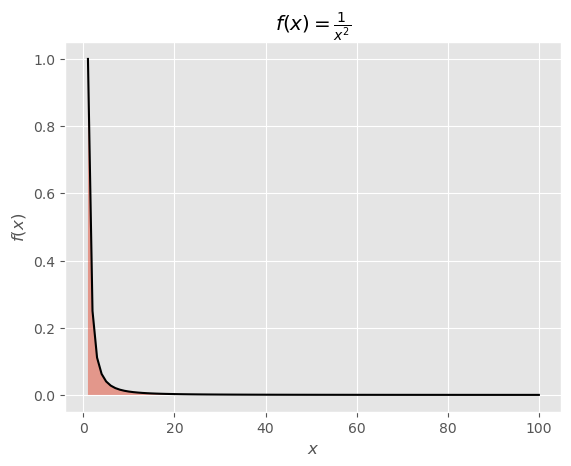

In [7]:
fun = lambda x : 1/x**2
a, b, size = 1, 1e2, 100
xs  = np.linspace(a, b, size)
plt.plot(xs, fun(xs), 'black'); # plt.plot(xs, np.zeros(100), 'black');
plt.fill_between(xs, fun(xs), alpha = 0.5); 
plt.xlabel(r"$x$"); plt.ylabel(r"$f(x)$"); plt.title(r"$f(x) = \frac{1}{x^2}$");


*Exemplo:* Calcula a integral impropia:

 $$
 \int_1^\infty \frac{1}{x} \, \mathrm{d}x
 $$

 Calculamos:

$$
\lim_{b \to \infty} \int_1^b \frac{1}{x} \, \mathrm{d}x = \lim_{b \to \infty} \left. -\log x \right|_1^b =  \lim_{b\to \infty} \log b - 0 = \infty
$$

 Neste caso, a integral diverxe



Na seguinte cela mostramos a integral


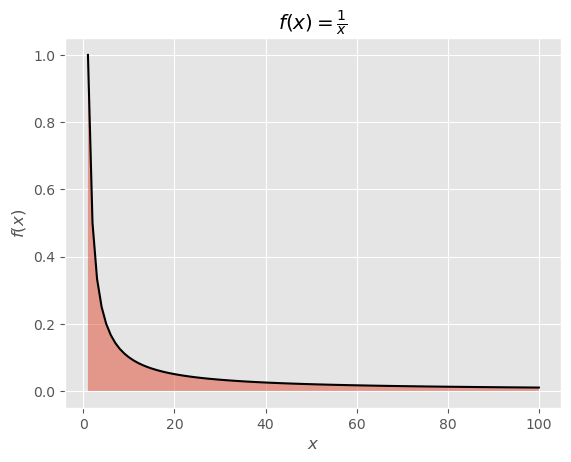

In [8]:
fun = lambda x : 1/x
a, b, size = 1, 1e2, 100
xs  = np.linspace(a, b, size)
plt.plot(xs, fun(xs), 'black'); # plt.plot(xs, np.zeros(100), 'black');
plt.fill_between(xs, fun(xs), alpha = 0.5); 
plt.xlabel(r"$x$"); plt.ylabel(r"$f(x)$"); plt.title(r"$f(x) = \frac{1}{x}$");


### Funcións non acoutadas

 Se a función non está acoutada ao final do intervalo, recorremos de novo ao cálculo dos límites.

 Por exemplo, se a función non está limitada a $b$, o extremo superior do intervalo, entón:

$$
\int_a^b f(x)\, \mathrm{d}x \equiv \lim_{y \to b}\int_a^y f(x) \, \mathrm{d}x
$$

 e do mesmo xeito para o caso no que a función non estaba limitada en $a$.

 Se a función non está limitada nun punto $c$ dentro do intervalo $[a, b]$:

$$
\int_a^b f(x) \, \mathrm{d}x \equiv \lim_{y \to c^-} \int_a^y f(x) \, \mathrm{d}x + \lim_{y \to c^+} \int_y^b f(x) \, \mathrm{d}x
$$


*Exemplo:* Calcula a integral impropia

 $$
 \int_0^1 \frac{1}{\sqrt{1-x}} \, \mathrm{d}x
 $$

 A función non está limitada en $b = 1$, polo tanto calculamos:

$$
\lim_{y \to 1} \int_0^y \frac{1}{\sqrt{1-x}} \, \mathrm{d}x = \lim_{y \to 1} \left. - 2 \sqrt{1-x} \right|_0^y = \lim_{y \to 1} - 2 \sqrt{1-y} + 2 = 2
$$

 A integral converxe.



Verifímolo na seguinte cela:


In [9]:
sp.integrate("1/sqrt(1-x)", (x, 0, 1))

2


Na seguinte cela mostramos a integral:


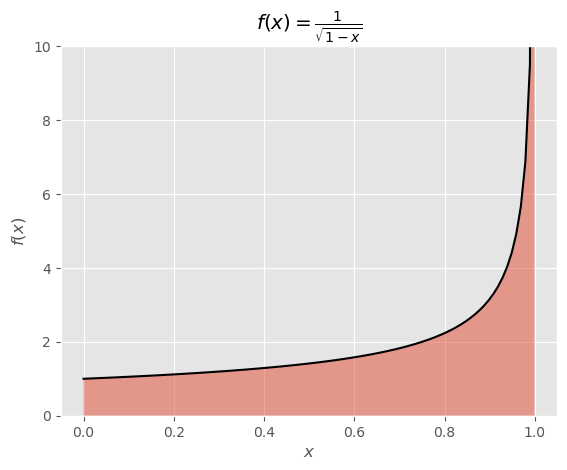

In [10]:
fun = lambda x : 1/np.sqrt(1-x) 
a, b, size = 0., 0.999, 100
xs  = np.linspace(a, b, size)
plt.plot(xs, fun(xs), 'black'); # plt.plot(xs, np.zeros(100), 'black');
plt.fill_between(xs, fun(xs), alpha = 0.5); 
plt.xlabel(r"$x$"); plt.ylabel(r"$f(x)$"); plt.title(r"$f(x) = \frac{1}{\sqrt{1-x}}$")
plt.ylim(0, 10);


*Exemplo* : Calcula a integral impropia

 $$
 \int_0^2 \frac{1}{(1-x)^2} \, \mathrm{d}x
 $$

 A función non está acoutada no punto interior $x = 1$.

 Calculamos a integral:

$$
\lim_{y \to 1^-} \int_0^y \frac{1}{(1-x)^2} \, \mathrm{d}x + \lim_{y \to 1^+} \int_y^2 \frac{1}{(1-x)^2} \, \mathrm{d}x \\
= \lim_{y \to 1^-} \left.  \frac{1}{(1-x)} \right|_0^y + \lim_{y \to 1^+} \left.  \frac{1}{(1-x)} \right|_y^2 \\
$$
$$
\lim_{y \to 1^-}   \frac{1}{(1-y)} - \lim_{y \to 1^+} \frac{1}{(1-y)} -2
$$

 Ningún límite existe e a integral diverxe



Comprobamos con *SymPy* :


In [11]:
sp.integrate("1/(1-x)^2", (x, 0, 2))

oo


Na seguinte cela mostramos a integral


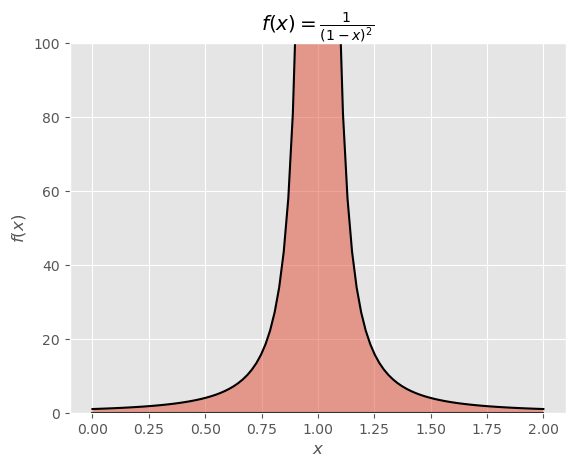

In [12]:
fun = lambda x : 1/(1-x)**2 
a, b, size = 0., 2, 100
xs  = np.linspace(a, b, size)
plt.plot(xs, fun(xs), 'black'); plt.plot(xs, np.zeros(100), 'black');
plt.fill_between(xs, fun(xs), alpha = 0.5); 
plt.xlabel(r"$x$"); plt.ylabel(r"$f(x)$"); plt.title(r"$f(x) = \frac{1}{(1-x)^2}$")
plt.ylim(0, 100);